In [16]:
conda install geopy

Channels:
 - defaults
 - conda-forge
 - pytorch
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\micha\anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.11.26 |       haa95532_0         132 KB
    conda-24.11.0              |  py311haa95532_0         1.2 MB
    geographiclib-2.0          |  py311haa95532_0          87 KB
    geopy-2.4.1                |  py311haa95532_0         198 KB
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

  geographiclib      pkgs/main/win-64::geographiclib-2.0-py311haa95532_0 
  geopy              pkgs/main/win-64::geopy-2.4.1-py311haa95532_0 

The following packages will be UPDATED:

  ca-certificates  

'L' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import meteostat
import geopy

In [42]:
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="geo_locator")

# Specify the city
city = "Mickleton, New Jersey"

# Get the location
location = geolocator.geocode(city)

# Print the coordinates
if location:
    print(f"Coordinates of {city}:")
    print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")
else:
    print(f"Could not find coordinates for {city}")

stations = Stations()
start_date = datetime(2023, 12, 1)
end_date = datetime(2023, 12, 3)
ohthatstheone = stations.nearby(location.latitude,location.longitude).fetch().head(1)
ohthatstheone['latitude']
weather_location = Point(ohthatstheone['latitude'],ohthatstheone['longitude'])
weather_location

data = Daily(weather_location, start_date, end_date)
data = data.fetch()

# Print the temperature data
print(f"Temperature on {start_date.date()}:")
print(f"Min: {data['tmin'][0]}°C")
print(f"Max: {data['tmax'][0]}°C")

Coordinates of Mickleton, New Jersey:
Latitude: 39.7901134, Longitude: -75.2376834
Temperature on 2023-12-01:
Min: 1.7°C
Max: 9.4°C


In [12]:
from meteostat import Stations

# Initialize the Stations class
stations = Stations()

# Filter by country code 'CA' (Canada) and state code 'ON' (Ontario)
stations.count()

15921

In [14]:
from meteostat import Stations
import pandas as pd

# Set the location coordinates (for example, Lima, Peru)
lat, lon = -12.0467, -77.0428  # Lima, Peru

# Search for stations within a certain distance (e.g., 100 km)
stations = Stations()
stations = stations.nearby(lat, lon).fetch()

# Show the stations near the location
stations[['name', 'latitude', 'longitude', 'elevation']]


,name,latitude,longitude,elevation
id,,,,
84628,Lima-Callao / Aerop. Internacional Jorgechavez,-12.0000,-77.1167,12.0
84691,Pisco,-13.7500,-76.2833,8.0
84564,Huanuco,-9.9000,-75.7500,1859.0
SPMF0,Mazamari,-11.3254,-74.5356,685.0
84542,Anta Huaraz,-9.3500,-77.6000,2750.0
...,...,...,...,...
VDSV0,Sihanoukville / Phum? Bát Tráng (1),10.5797,103.6370,10.0
48966,Siemreap,13.3667,103.8500,15.0
48480,Chanthaburi,12.6000,102.1167,3.0


In [46]:
thisdate = "2023-01-01"


AttributeError: 'str' object has no attribute 'to_datetime'

In [39]:
from datetime import datetime
from meteostat import Point, Daily

# Define the location (latitude, longitude, and elevation)
location = Point(12.0467, -77.0428)  # Coordinates for London

# Define the date (e.g., December 1, 2023)
start_date = datetime(2023, 12, 1)
end_date = datetime(2023, 12, 2)

# Get historical daily weather data for the location
data = Daily(location, start_date, end_date)
data = data.fetch()

# Print the temperature data
print(f"Temperature on {start_date.date()}:")
print(f"Min: {data['tmin'][0]}°C")
print(f"Max: {data['tmax'][0]}°C")


Temperature on 2023-12-01:


KeyError: 0

In [50]:
temperature_curve

array([10.        , 10.2555563 , 11.00480947, 12.19669914, 13.75      ,
       15.55885716, 17.5       , 19.44114284, 21.25      , 22.80330086,
       23.99519053, 24.7444437 , 25.        , 24.7444437 , 23.99519053,
       22.80330086, 21.25      , 19.44114284, 17.5       , 15.55885716,
       13.75      , 12.19669914, 11.00480947, 10.2555563 ])

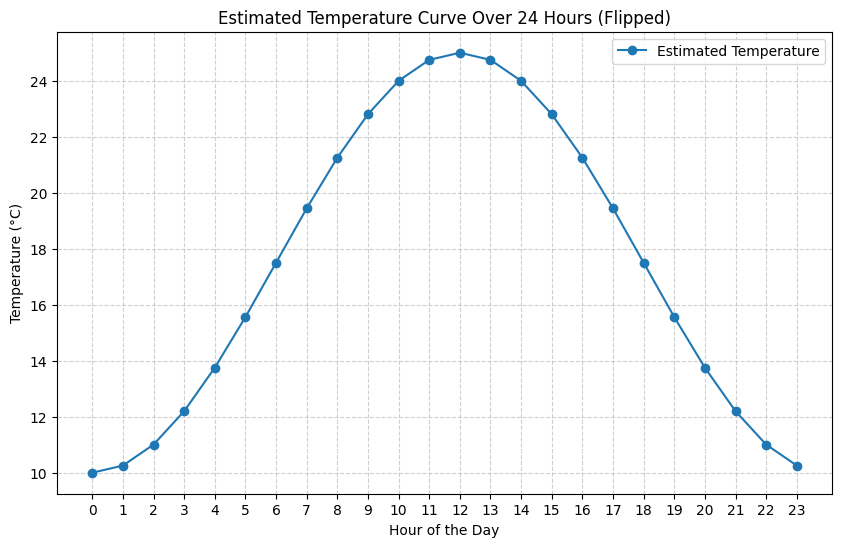

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def generate_temperature_curve_flipped(min_temp, max_temp):
    """
    Generates a 24-hour temperature curve based on minimum and maximum temperatures,
    ensuring the maximum occurs around 12 PM and the minimum occurs overnight.

    Parameters:
        min_temp (float): The minimum temperature (occurs overnight, around 4-6 AM).
        max_temp (float): The maximum temperature (occurs mid-afternoon, around 12 PM).

    Returns:
        np.ndarray: A 24-element vector representing hourly temperatures.
    """
    # Define the time range (0 to 23 hours)
    hours = np.arange(24)
    
    # Estimate peak and trough times
    max_hour = 12  # Typical time for maximum temperature (noon)
    min_hour = 5   # Typical time for minimum temperature (early morning)
    
    # Sinusoidal temperature curve equation
    # Amplitude: (max_temp - min_temp) / 2
    # Midline: (max_temp + min_temp) / 2
    amplitude = (max_temp - min_temp) / 2
    midline = (max_temp + min_temp) / 2
    
    # Phase shift to align minimum and maximum times
    phase_shift = (max_hour - 6) % 24  # Align the maximum temperature at noon
    temperature_curve = midline + amplitude * np.sin((2 * np.pi / 24) * (hours - phase_shift))
    
    return hours, temperature_curve

# Example usage
min_temp = 10  # Replace with your min temperature from the data
max_temp = 25  # Replace with your max temperature from the data

hours, temperature_curve = generate_temperature_curve_flipped(min_temp, max_temp)

# Plot the temperature curve
plt.figure(figsize=(10, 6))
plt.plot(hours, temperature_curve, marker="o", label="Estimated Temperature")
plt.title("Estimated Temperature Curve Over 24 Hours (Flipped)")
plt.xlabel("Hour of the Day")
plt.ylabel("Temperature (°C)")
plt.xticks(hours)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


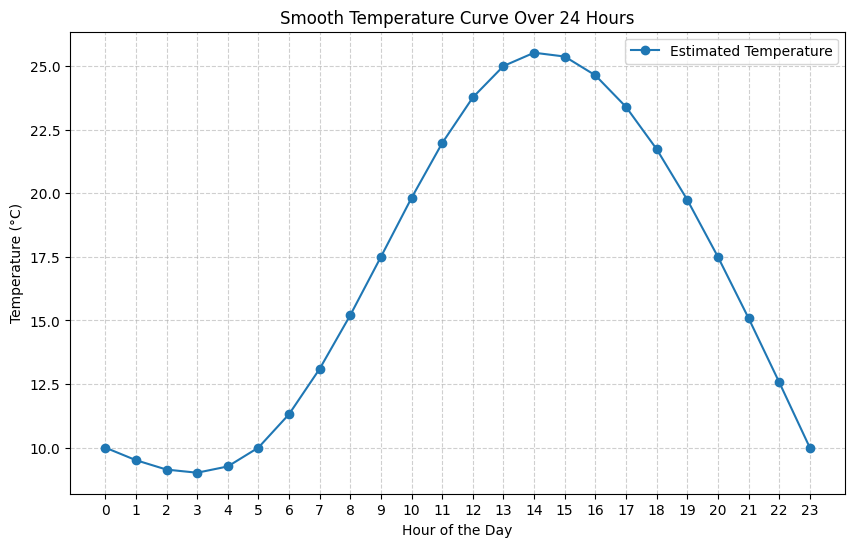

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def generate_smooth_temperature_curve(min_temp, max_temp):
    """
    Generates a 24-hour temperature curve based on minimum and maximum temperatures,
    with smooth transitions using cubic spline interpolation.

    Parameters:
        min_temp (float): The minimum temperature (occurs early morning, around 5-6 AM).
        max_temp (float): The maximum temperature (occurs mid-afternoon, around 2-3 PM).

    Returns:
        np.ndarray: A 24-element vector representing hourly temperatures.
    """
    # Define key points for the temperature curve
    key_hours = np.array([0, 5, 9, 13, 20, 23])  # Midnight, morning, peak, evening, late night
    key_temps = np.array([
        min_temp,   # Midnight temperature
        min_temp,   # Minimum temperature at 5 AM
        (min_temp + max_temp) / 2,  # Morning rise
        max_temp,   # Peak temperature at 2 PM
        (min_temp + max_temp) / 2,  # Evening cooling
        min_temp    # Back to nighttime cooling
    ])
    
    # Create a cubic spline to smoothly interpolate
    spline = CubicSpline(key_hours, key_temps, bc_type='natural')

    # Generate the temperature for each hour
    hours = np.arange(24)
    temperatures = spline(hours)

    return hours, temperatures

# Example usage
min_temp = 10  # Replace with the min temperature from the data
max_temp = 25  # Replace with the max temperature from the data

hours, temperature_curve = generate_smooth_temperature_curve(min_temp, max_temp)

# Plot the temperature curve
plt.figure(figsize=(10, 6))
plt.plot(hours, temperature_curve, marker="o", label="Estimated Temperature")
plt.title("Smooth Temperature Curve Over 24 Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Temperature (°C)")
plt.xticks(hours)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


In [77]:
from datetime import datetime

# Example date
selected_date = datetime(2023, 1, 1)

# Calculate day of the year
day_of_year = selected_date.timetuple().tm_yday
print(f"Day of the year for {selected_date.strftime('%B %d, %Y')}: {day_of_year}")


Day of the year for January 01, 2023: 1


In [58]:
from geopy.geocoders import Nominatim
from timezonefinder import TimezoneFinder
from datetime import datetime
import pytz

# Initialize the geolocator and timezone finder
geolocator = Nominatim(user_agent="geo_locator")
tf = TimezoneFinder()

# City input
city = "Bethlehem, PA"
location = geolocator.geocode(city)

if location:
    latitude = location.latitude
    longitude = location.longitude

    # Find timezone name
    timezone_name = tf.timezone_at(lat=latitude, lng=longitude)
    if timezone_name:
        # Get current time in the timezone
        timezone = pytz.timezone(timezone_name)
        utc_offset = timezone.utcoffset(datetime.now())
        offset_hours = utc_offset.total_seconds() / 3600

        print(f"City: {city}")
        print(f"Latitude: {latitude}, Longitude: {longitude}")
        print(f"Timezone Offset: {offset_hours} hours")
    else:
        print(f"Could not determine the timezone for {city}")
else:
    print(f"Could not find the city: {city}")

City: Bethlehem, PA
Latitude: 40.6178915, Longitude: -75.3786521
Timezone Offset: -5.0 hours


In [119]:
# user inputs
Latitude = latitude
Longitude = longitude
TZ = offset_hours
Pressure = 1000
Ozone = 0.3
H2O = 1.5
AOD500 = 0.1
AOD380 = 0.15
Taua = 0.2758*aod380+0.35*aod500
Ba = 0.85
Albedo = 0.2

# disclaimer
DOY = [selected_date.timetuple().tm_yday]*23
HR = list(range(1,24))
ETR = [1367 * (1.00011+ 0.034221 * np.cos(np.radians(2 * np.pi * (d - 1) / 365))+ 0.00128 * np.sin(np.radians(2 * np.pi * (d - 1) / 365))+ 0.000719 * np.cos(np.radians(2 * (2 * np.pi * (d - 1) / 365)))+ 0.000077 * np.sin(np.radians(2 * (2 * np.pi * (d - 1) / 365))))for d in DOY]
dangle = [6.283185*(d-1)/365 for d in DOY]

bird = pd.DataFrame([DOY,HR,ETR,dangle]).T
bird.columns = ['DOY','HR','ETR','dangle']

# Intermediate Parameters

bird['DEC'] = (0.006918-0.399912*np.cos(np.radians(bird['dangle']))+0.070257*np.sin(np.radians(bird['dangle']))-0.006758*np.cos(2*np.radians(bird['dangle'])) +0.000907*np.sin(2*np.radians(bird['dangle']))-0.002697*np.cos(3*np.radians(bird['dangle']))+0.00148*np.sin(3*np.radians(bird['dangle'])))*(180/np.pi)
bird['EQT'] = (0.0000075+0.001868*np.cos(np.radians(bird['dangle']))-0.032077*np.sin(np.radians(bird['dangle']))-0.014615*np.cos(2*np.radians(bird['dangle'])) -0.040849*np.sin(2*np.radians(bird['dangle'])))*(229.18)
bird['Hour_Angle'] = 15*(bird['HR']-12.5)+(Longitude)-(TZ)*15+bird['EQT']/4
bird['Zenith_Air'] = np.arccos(np.cos(np.radians(bird['DEC'])) * np.cos(np.radians(Latitude)) * np.cos(np.radians(bird['Hour_Angle'])) +np.sin(np.radians(bird['DEC'])) * np.sin(np.radians(Latitude))) * (180 / np.pi)
bird['Air_Mass'] = np.where(bird['Zenith_Air'] < 89,1 / (np.cos(np.radians(bird['Zenith_Air'])) +0.15 / (93.885 - bird['Zenith_Air'])**1.25),0)

# Intermediate Results

bird['T_rayleigh'] = np.where(bird['Air_Mass'] > 0,np.exp(-0.0903 * ((Pressure * bird['Air_Mass'] / 1013)**0.84 *(1 + Pressure * bird['Air_Mass'] / 1013 -(Pressure * bird['Air_Mass'] / 1013)**1.01))),0)
bird['T_ozone'] = np.where(bird['Air_Mass'] > 0, 1 - 0.1611 * (Ozone * bird['Air_Mass']) * (1 + 139.48 * (Ozone * bird['Air_Mass']))**-0.3034 - 0.002715 * (Ozone * bird['Air_Mass']) / (1 + 0.044 * (Ozone * bird['Air_Mass']) + 0.0003 * (Ozone * bird['Air_Mass'])**2), 0)
bird['T_gases'] = np.where(bird['Air_Mass'] > 0, np.exp(-0.0127 * (bird['Air_Mass'] * Pressure / 1013)**0.26), 0)
bird['T_water'] = np.where(bird['Air_Mass'] > 0, 1 - 2.4959 * bird['Air_Mass'] * H2O / ((1 + 79.034 * H2O * bird['Air_Mass'])**0.6828 + 6.385 * H2O * bird['Air_Mass']), 0)
bird['T_aerosol'] = np.where(bird['Air_Mass'] > 0, np.exp(-(Taua**0.873) * (1 + Taua - Taua**0.7088) * bird['Air_Mass']**0.9108), 0)
bird['TAA'] = np.where(bird['Air_Mass'] > 0, 1 - 0.1 * (1 - bird['Air_Mass'] + bird['Air_Mass']**1.06) * (1 - bird['T_aerosol']), 0)
bird['rs'] = np.where(bird['Air_Mass'] > 0, 0.0685 + (1 - Ba) * (1 - bird['T_aerosol'] / bird['TAA']), 0)
bird['Id'] = np.where(bird['Air_Mass'] > 0, 0.9662 * bird['ETR'] * bird['T_aerosol'] * bird['T_water'] * bird['T_gases'] * bird['T_ozone'] * bird['T_rayleigh'], 0)
bird['IdnH'] = np.where(bird['Zenith_Air'] < 90, bird['Id'] * np.cos(np.radians(bird['Zenith_Air'])), 0)
bird['Ias'] = np.where(bird['Air_Mass'] > 0,bird['ETR'] * np.cos(np.radians(bird['Zenith_Air'])) * 0.79 * bird['T_ozone'] * bird['T_gases'] * bird['T_water'] * bird['TAA'] * (0.5 * (1 - bird['T_rayleigh']) + Ba * (1 - (bird['T_aerosol'] / bird['TAA']))) / (1 - bird['Air_Mass'] + bird['Air_Mass']**1.02),0)
bird['GH'] = np.where(bird['Air_Mass'] > 0, (bird['IdnH'] + bird['Ias']) / (1 - Albedo * bird['rs']), 0)

# Decimal Time

bird['Decimal_Time'] = bird['DOY'] + (bird['HR'] - 0.5) / 24

# Model Results

bird['Direct_Beam'] = bird['Id']
bird['Direct_Hz'] = bird['IdnH']
bird['Global_Hz'] = bird['GH']
bird['Dif_Hz'] = bird['Global_Hz'] - bird['Direct_Hz']
bird

,DOY,HR,ETR,dangle,DEC,EQT,Hour_Angle,Zenith_Air,Air_Mass,T_rayleigh,...,rs,Id,IdnH,Ias,GH,Decimal_Time,Direct_Beam,Direct_Hz,Global_Hz,Dif_Hz
0,185.0,1.0,1414.94418,3.167414,-22.776989,-4.338997,-173.963401,161.447058,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.020833,0.000000,0.000000,0.000000,0.000000
1,185.0,2.0,1414.94418,3.167414,-22.776989,-4.338997,-158.963401,154.859022,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.062500,0.000000,0.000000,0.000000,0.000000
2,185.0,3.0,1414.94418,3.167414,-22.776989,-4.338997,-143.963401,144.883471,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.104167,0.000000,0.000000,0.000000,0.000000
3,185.0,4.0,1414.94418,3.167414,-22.776989,-4.338997,-128.963401,133.799274,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.145833,0.000000,0.000000,0.000000,0.000000
4,185.0,5.0,1414.94418,3.167414,-22.776989,-4.338997,-113.963401,122.431594,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.187500,0.000000,0.000000,0.000000,0.000000
5,185.0,6.0,1414.94418,3.167414,-22.776989,-4.338997,-98.963401,111.166473,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.229167,0.000000,0.000000,0.000000,0.000000
6,185.0,7.0,1414.94418,3.167414,-22.776989,-4.338997,-83.963401,100.278588,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.270833,0.000000,0.000000,0.000000,0.000000
7,185.0,8.0,1414.94418,3.167414,-22.776989,-4.338997,-68.963401,90.046175,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.312500,0.000000,0.000000,0.000000,0.000000
8,185.0,9.0,1414.94418,3.167414,-22.776989,-4.338997,-53.963401,80.810412,6.033724,0.697040,...,0.120865,451.995738,72.184534,47.759647,122.915420,185.354167,451.995738,72.184534,122.915420,50.730886
9,185.0,10.0,1414.94418,3.167414,-22.776989,-4.338997,-38.963401,73.013267,3.383950,0.787708,...,0.103011,654.131691,191.104742,71.741185,268.375045,185.395833,654.131691,191.104742,268.375045,77.270303


In [70]:
np.pi

3.141592653589793

In [56]:
from geopy.geocoders import Nominatim
from timezonefinder import TimezoneFinder

# Initialize the geolocator and timezone finder
geolocator = Nominatim(user_agent="geo_locator")
tf = TimezoneFinder()

# City input
city = "Bethlehem, PA"
location = geolocator.geocode(city)

if location:
    latitude = location.latitude
    longitude = location.longitude
    timezone = tf.timezone_at(lat=latitude, lng=longitude)

    print(f"City: {city}")
    print(f"Latitude: {latitude}, Longitude: {longitude}")
    print(f"Timezone: {timezone}")
else:
    print(f"Could not find the city: {city}")


City: Bethlehem, PA
Latitude: 40.6178915, Longitude: -75.3786521
Timezone: America/New_York
